# Neural Networks for Classification

In this notebook we are going to explore the use of Neural Networks for image classification. We are going to use a dataset of small images of clothes and accessories, the Fashion MNIST. You can find more information regarding the dataset here: https://pravarmahajan.github.io/fashion/

Each instance in the dataset consist of an image, in a format similar to the digit images you have seen in the previous homework, and a label. The labels correspond to the type of clothing, as follows:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

Let's first load the required packages.

In [14]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

The following is a function to load the data, that we are going to use later in the notebook.

In [15]:
# helper function to load Fashion MNIST dataset from disk
def load_fashion_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

## TO DO 0
Place your ID ("numero di matricola") that will be used as seed for random generator. Change the ID number in case you observe unexpected behaviours and want to test if this is due to randomization (e.g., train/test split). If you change the ID number explain why you have change it.

In [16]:
ID = 1205720
np.random.seed(ID)

Now we load the dataset using the function above.

In [17]:
#load the fashion MNIST dataset and normalize the features so that each value is in [0,1]
X, y = load_fashion_mnist("data")
# rescale the data
X = X / 255.0

Now we split the data into training and test. Make sure that each label is present at least 10 times
in the training set.

In [18]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rests as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

print("Labels and frequencies in training dataset: \n")
lab,counts = np.unique(y_train, return_counts = True)
check = True
while check==True:
    if(np.any(counts < 10)): 
        permutation = np.random.permutation(X.shape[0])
        X = X[permutation]
        y = y[permutation]
        X_train, X_test = X[:m_training], X[m_training:]
        y_train, y_test = y[:m_training], y[m_training:]
        lab,counts = np.unique(y_train, return_counts = True)
        check = np.any(counts < 10)
    else:
        check = False
print("Labels:     ",lab)
print("Frequencies:",counts)

Labels and frequencies in training dataset: 

Labels:      [0 1 2 3 4 5 6 7 8 9]
Frequencies: [45 51 62 50 45 46 56 59 43 43]


The following function plots an image and the corresponding label, to be used to inspect the data when needed.

In [19]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

Now let's test the function above and check few images.

INPUT:


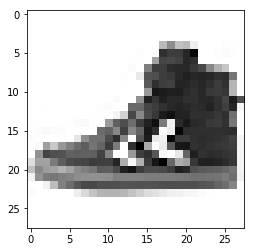

LABEL: 7
INPUT:


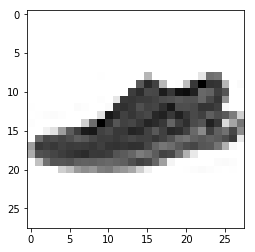

LABEL: 5
INPUT:


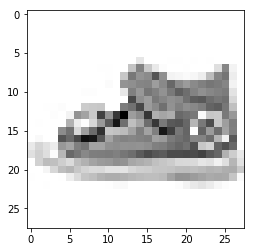

LABEL: 5


In [20]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,300)

## TO DO 1

Now use a (feed-forward) Neural Network for prediction. Use the multi-layer perceptron (MLP) classifier MLPClassifier(...) in scikit-learn, with the following parameters: max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization parameter for L2 regularization that is used by the MLP in sklearn.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 100. You can evaluate the architectures you chose using the GridSearchCV with a 5-fold cross-validation, and use the results to pick the best architecture. The code below provides some architectures you can use, but you can choose other ones if you prefer.


In [8]:
#MLPclassifier requires in input the parameter hidden_layer_sizes, that is a tuple specifying the number of 
#neurons in the hidden layers; for example: (10,) means that there is only 1 hidden layer with 10 neurons; 
#(10,50) means that there are 2 hidden layers, the first with 10 neurons, the second with 50 neurons

#these are examples of possible architectures you can test, but feel free to use different architectures! 
hl_parameters = {'hidden_layer_sizes': [(10,), (50,), (75,), (100,), (10,10,), (50,50,)]}

neural_net = MLPClassifier(max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID)

clf = GridSearchCV(neural_net, hl_parameters, cv=5)
clf.fit(X_train,y_train)
    
print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(clf.best_params_)

print("Score with best parameters:")
print(clf.best_score_)

print("\nAll scores on the grid:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
d = {'architecture': clf.cv_results_['params'], 'score': means,'std':stds}
results = pd.DataFrame(data=d)
display(results)

RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (100,)}
Score with best parameters:
0.694

All scores on the grid:


,architecture,score,std
0,"{'hidden_layer_sizes': (10,)}",0.452,0.198382
1,"{'hidden_layer_sizes': (50,)}",0.630,0.190198
2,"{'hidden_layer_sizes': (75,)}",0.652,0.141495
3,"{'hidden_layer_sizes': (100,)}",0.694,0.104061
4,"{'hidden_layer_sizes': (10, 10)}",0.438,0.184111
5,"{'hidden_layer_sizes': (50, 50)}",0.528,0.255742


## TO DO 2

What do you observe for different architectures and their scores? How do the number of layers and their sizes affect the performances?

Increasing the complexity of the model choosing a constantly growing number of neurons in a single layer seems to significantly improve the performance, at least as long as the point of overfitting is reached and the score decreases considerably.<br>
With the addition of another layer with the same amount of neurons as the original, the performance worsens significantly, this result may be due to an increase in the complexity of the model leading to overfitting and resulting in worse scores overall.

## TO DO 3

Now get training and test error (according to the initial split) for a NN with best parameters chosen from the cross-validation above (and learning the NN weights from the entire training set). Use verbose=True
in input so to see how loss changes in iterations. (Note that the loss used by the MLPclassifier may be different from the 0-1 loss, also called *accuracy*.)

In [9]:
#get training and test error for the best NN model from CV

neural_net = MLPClassifier(hidden_layer_sizes=(100,),verbose=True,max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID)
neural_net.fit(X_train,y_train)

training_error = 1 - neural_net.score(X_train,y_train)

test_error = 1 - neural_net.score(X_test,y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

Iteration 1, loss = 2.29088048
Iteration 2, loss = 1.39213092
Iteration 3, loss = 1.29091348
Iteration 4, loss = 0.97344097
Iteration 5, loss = 0.70554331
Iteration 6, loss = 0.63315836
Iteration 7, loss = 0.70037829
Iteration 8, loss = 0.56088507
Iteration 9, loss = 0.48840894
Iteration 10, loss = 0.47509350
Iteration 11, loss = 0.39211883
Iteration 12, loss = 0.38161143
Iteration 13, loss = 0.36562898
Iteration 14, loss = 0.32396200
Iteration 15, loss = 0.33000822
Iteration 16, loss = 0.33536171
Iteration 17, loss = 0.25327036
Iteration 18, loss = 0.30645125
Iteration 19, loss = 0.23995626
Iteration 20, loss = 0.21698164
Iteration 21, loss = 0.21145272
Iteration 22, loss = 0.25271476
Iteration 23, loss = 0.19402252
Iteration 24, loss = 0.17043932
Iteration 25, loss = 0.15630977
Iteration 26, loss = 0.17894865
Iteration 27, loss = 0.17803952
Iteration 28, loss = 0.12506976
Iteration 29, loss = 0.14123583
Iteration 30, loss = 0.18394049
Iteration 31, loss = 0.09554194
Iteration 32, los

## More data 
Now let's do the same but using 10000 (or less if it takes too long on your machine) data points for training. Use the same NN architectures as before, but you can try more if you want!

In [21]:
X = X[permutation]
y = y[permutation]

m_training = 10000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

print("Labels and frequencies in training dataset: ")
np.unique(y_train, return_counts=True)

Labels and frequencies in training dataset: 


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1004,  987,  968, 1019, 1009, 1015,  989, 1006,  958, 1045]))

## TO DO 4

Now train the NNs with the added data points. Feel free to try more different architectures than before if you want, or less if it takes too much time. You can use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [11]:
#for NN we try the same architectures as before
hl_parameters = {'hidden_layer_sizes': [(10,), (50,), (100,), (10,10,), (50,50,), (100,100,), (50,50,50,)]}

neural_net_larger = MLPClassifier(max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID)

clf = GridSearchCV(neural_net_larger, hl_parameters, cv=5)
clf.fit(X_train,y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(clf.best_params_)

print("Score with best parameters:")
print(clf.best_score_)

print("\nAll scores on the grid:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
d = {'architecture': clf.cv_results_['params'], 'score': means,'std':stds}
results = pd.DataFrame(data=d)
display(results)

RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (100, 100)}
Score with best parameters:
0.8232

All scores on the grid:


,architecture,score,std
0,"{'hidden_layer_sizes': (10,)}",0.5966,0.275726
1,"{'hidden_layer_sizes': (50,)}",0.7303,0.140511
2,"{'hidden_layer_sizes': (100,)}",0.8048,0.051558
3,"{'hidden_layer_sizes': (10, 10)}",0.6212,0.224610
4,"{'hidden_layer_sizes': (50, 50)}",0.8211,0.043631
5,"{'hidden_layer_sizes': (100, 100)}",0.8232,0.047116
6,"{'hidden_layer_sizes': (50, 50, 50)}",0.6770,0.289743


## TO DO 5
Describe your architecture choices and the results you observe with respect to the architectures you used.

The overall results are clearly better than the training done with only 500 samples, in this case the best result is obtained by adding a layer to the best architecture used for 500 examples. In fact, managing a large number of samples, may be preferable to use a greater number of layers, to the detriment of the greater complexity of the model. By further increasing the number of layers, the result gets worse, probably due to overfitting.

## TO DO 6

Get the train and test error for the best NN you obtained with 10000 points. This time you can run for 100 iterations if you cannot run for 300 iterations. 


In [12]:
#get training and test error for the best NN model from CV

neural_net_larger = MLPClassifier(hidden_layer_sizes=(100,100,),verbose=True,max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1,random_state=ID)
neural_net_larger.fit(X_train,y_train)

training_error = 1 - neural_net_larger.score(X_train,y_train)

test_error = 1 - neural_net_larger.score(X_test,y_test)

print ('RESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

Iteration 1, loss = 0.91413695
Iteration 2, loss = 0.51096778
Iteration 3, loss = 0.43737165
Iteration 4, loss = 0.40312828
Iteration 5, loss = 0.37117121
Iteration 6, loss = 0.34109057
Iteration 7, loss = 0.31616043
Iteration 8, loss = 0.30849438
Iteration 9, loss = 0.29402065
Iteration 10, loss = 0.28018005
Iteration 11, loss = 0.26646317
Iteration 12, loss = 0.25841739
Iteration 13, loss = 0.23786771
Iteration 14, loss = 0.23583972
Iteration 15, loss = 0.22508297
Iteration 16, loss = 0.20850698
Iteration 17, loss = 0.20978433
Iteration 18, loss = 0.19924619
Iteration 19, loss = 0.18684963
Iteration 20, loss = 0.18309877
Iteration 21, loss = 0.18225026
Iteration 22, loss = 0.17164257
Iteration 23, loss = 0.16396984
Iteration 24, loss = 0.15546010
Iteration 25, loss = 0.14800568
Iteration 26, loss = 0.16416383
Iteration 27, loss = 0.15579473
Iteration 28, loss = 0.13177856
Iteration 29, loss = 0.14112696
Iteration 30, loss = 0.13192906
Iteration 31, loss = 0.13150722
Iteration 32, los

## TO DO 7

Compare the train and test error you got with a large number of samples with the best one you obtained with only 500 data points. Are the architectures the same or do they differ? What about the errors you get?

The architectures are different only for the number of layers: a layer for the architecture used with 500 samples and two layers for the one with a larger number of samples, both with 100 neurons. With a larger number of samples, the training error increases, while the test error gets lower. This can be explained considering that with a bigger samples size the chance of overfitting is smaller, therefore the model's predictions are more reliable, in fact the test error improve, even though the training error gets worse.

## TO DO 8

Plot a digit that was missclassified by NN with m=500 training data points and it is now instead correctly classified by NN with m=10000 training data points.

The clothing found is: 4

INPUT:


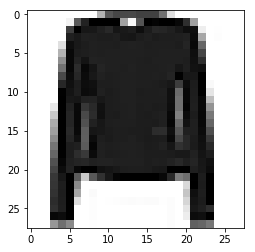

LABEL: 4

The label predicted by NN with m=500 is: 2
The label predicted by NN with m=10000 is: 4


In [13]:
digit_found = False
predict_nn = neural_net.predict(X_test)
predict_larger_nn = neural_net_larger.predict(X_test)
for m in range(y_test.shape[0]):
    if(predict_nn[m] != y_test[m] and predict_larger_nn[m]==y_test[m]):
        if(digit_found==False):
            print("The clothing found is:%2i\n" %y_test[m])
            plot_input(X_test,y_test,m)
            print("\nThe label predicted by NN with m=500 is:%2i" %(predict_nn[m]))
            print("The label predicted by NN with m=10000 is:%2i" %(predict_larger_nn[m]))
            digit_found = True

Let's plot some of the weigths of the multi-layer perceptron classifier, for the best NN we get with 500 data points and with 50000 data points. The code below plots the weights in a matrix form, where a figure represents all the weights of the edges entering in a hidden node. Notice that the code assumes that the NNs are called "mlp" and "best_mlp_large": you may need to replace such variables with your variable names. 



Weights with 500 data points:


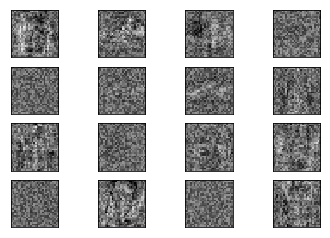

Weights with 10000 data points:


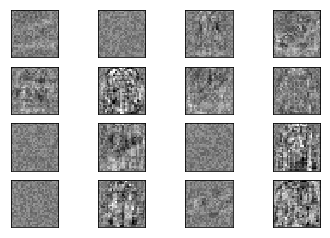

In [15]:
print("Weights with 500 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = neural_net.coefs_[0].min(), neural_net.coefs_[0].max()
for coef, ax in zip(neural_net.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 10000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = neural_net_larger.coefs_[0].min(), neural_net_larger.coefs_[0].max()
for coef, ax in zip(neural_net_larger.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## TO DO 9

Describe what do you observe by looking at the weights.

Looking at the weights it is clear that with a larger sample size the weights are less influenced by noise, which makes them more relevant to make accurate predictions.

## TO DO 10

Pick another classifier among the ones we have seen previously (SVM or something else). Report the training and test error for such classifier with 10000 samples in the training set, if possible; if the classifier cannot run with so many data sample reduce the number of samples.

*Note*: if there are parameters to be optimized use cross-validation. If you choose SVM, you can decide if you want to use a single kernel or use the best among many; in the latter case, you need to pick the best kernel using cross-validation (using the functions available in sklearn).

**[WRITE HERE WHAT CLASSIFIER YOU ARE CHOOSING AND WHAT PARAMETERS YOU NEED TO SET.]**

I chose a SVM classifier with rbf kernel and parameters to set: C from {1,10,100} and gamma from {0.01,0.1,1}.

In [16]:
#import SVC
from sklearn.svm import SVC

# parameters for rbf SVM
parameters = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}

#run SVM with rbf kernel
rbf_SVM = SVC(kernel='rbf')
# ADD CODE: DO THE SAME AS ABOVE FOR RBF KERNEL
clf = GridSearchCV(rbf_SVM, parameters, cv=5)
clf.fit(X_train,y_train)

print ('\nRESULTS FOR rbf KERNEL\n')

print("Best parameters set found:")
print(clf.best_params_)

print("Score with best parameters:")
print(clf.best_score_)

print("\nAll scores on the grid:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
d = {'architecture': clf.cv_results_['params'], 'score': means,'std':stds}
results = pd.DataFrame(data=d)
display(results)


RESULTS FOR rbf KERNEL

Best parameters set found:
{'C': 10, 'gamma': 0.01}
Score with best parameters:
0.8731

All scores on the grid:


,architecture,score,std
0,"{'C': 1, 'gamma': 0.01}",0.8575,0.003894
1,"{'C': 1, 'gamma': 0.1}",0.7995,0.006510
2,"{'C': 1, 'gamma': 1.0}",0.1117,0.001289
3,"{'C': 10, 'gamma': 0.01}",0.8731,0.006200
4,"{'C': 10, 'gamma': 0.1}",0.8090,0.007129
5,"{'C': 10, 'gamma': 1.0}",0.1198,0.001904
6,"{'C': 100, 'gamma': 0.01}",0.8658,0.003864
7,"{'C': 100, 'gamma': 0.1}",0.8090,0.007129
8,"{'C': 100, 'gamma': 1.0}",0.1198,0.001904


From the results found the best model is rbf kernel with C=10 and gamma=0.01

In [18]:
best_SVM = SVC(kernel='rbf',C=10,gamma=0.01)
best_SVM.fit(X_train, y_train)

training_error_other = 1. - best_SVM.score(X_train,y_train)

test_error_other = 1. - best_SVM.score(X_test,y_test)

print ('RESULTS FOR OTHER CLASSIFIER\n')

print ("Best NN training error: %f" % training_error_other)
print ("Best NN test error: %f" % test_error_other)

RESULTS FOR OTHER CLASSIFIER

Best NN training error: 0.014400
Best NN test error: 0.121760


## TO DO 11
Compare the results of NN and of the other classifier you have chosen above. Which classifier would you preferer? Provide a brief explanation.

The classifier which yields better results is the SVM with rbf kernel. This can be explained considering that using SVM with kernel rbf on non-linear patterns works better than a neural network with a small number of layers, because it maps non-linear data onto a higher-dimensional space where it becomes linearly seperable. The SVM classifier with kernel rbf obtains therefore better performances in terms of decrease of the training and test error (although not significant), to the detriment of the longer time used for the training (only to set the parameters it took two hours).

# Clustering with K-means

Clustering is a useful technique for *unsupervised* learning. We are now going to cluster 2000 images in the fashion MNIST dataset, and try to understand if the clusters we obtain correspond to the true labels.

In [22]:
#load the required packages

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics import silhouette_score

(Note that the code below assumes that the data has already been transformed as in the NN part of the notebook, so make sure to run the code for the transformation even if you do not complete the part on NN.)

In [23]:
#let's consider only 2000 data points

X = X[permutation]
y = y[permutation]

m_training = 2000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [175 206 200 196 197 206 211 192 208 209]


## TO DO 1
Cluster the points using the KMeans() and fit() functions (see the userguide for details). For Kmeans, set: n_clusters=10 as number of clusters; n_init=10 as the number of times the algorithm will be run with different centroid seeds; random_state = ID. You can use the default setting for the other parameters.

In [24]:
kmeans = KMeans(n_clusters=10,n_init=10,random_state = ID).fit_predict(X_train)


## Comparison of clusters with true labels

## TO DO 2
Now compare the clustered obtained with the true labels, using the function sklearn.metrics.cluster.contingency_matrix() (see the userguide for details). The function prints a matrix $A$ such that entry $A_{i,j}$ is is the number of samples in true class $i$ and in predicted class $j$.

In [25]:
# compute and print the contingency matrix for the true lavels vs the clustering assignments
matrix = contingency_matrix(y_train,kmeans)
print(matrix)

[[  0   0  46 107   0   0  10   5   7   0]
 [  0   0   8   6   0   0   2   2 188   0]
 [  0   2  31   5   0   0 107  55   0   0]
 [  0   0  36  67   0   0   2   8  83   0]
 [  0   1  11  22   0   0 103  56   4   0]
 [ 11   0  56   1  15 123   0   0   0   0]
 [  0   0  57  36   0   1  72  42   1   2]
 [  0   0   2   0  31 159   0   0   0   0]
 [  0  74  24   1   3  10   3   8   1  84]
 [106   0  11   0  88   3   0   1   0   0]]


## TO DO 3
Based on the matrix shown above, comment on the results of clustering in terms of adherence to the true labels.

For the clustering results to be considered successful, for each true class the number of samples to be on one predicted class, and vice versa. This does not generally happen in our data, in fact only a few instances describe this distribution, in general the samples of a true class are divided equally into at least two or more predicted classes . This may suggest that our data is not suitable for clustering and that prediction will not be efficient.

## Choice of k with silhoutte coefficient
In many real applications it is unclear what is the correct value of $k$ to use. In practice one tries different values of $k$ and then uses some external score to choose a value of $k$. One such score is the silhoutte coefficient, that can be computed with metrics.silhouette_score(). See the definition of the silhoutte coefficient in the userguide.

## TO DO 4
Compute the clustering for k=2,3,...,15 (other parameters as above) and print the silhoutte coefficient for each such clustering.

In [26]:
#run k-means with 10 choices of initial centroids for a range of values of n_clusters

for i in range(2,16):
    kmeans = KMeans(n_clusters=i,n_init=10,random_state = ID).fit(X_train)
    silhouttescore = silhouette_score(X_train,kmeans.labels_)
    print("Silhoutte coefficient for number of clusters="+str(i)+": "+str(silhouttescore))

Silhoutte coefficient for number of clusters=2: 0.18494311290543095
Silhoutte coefficient for number of clusters=3: 0.17971189663187387
Silhoutte coefficient for number of clusters=4: 0.18278698141388697
Silhoutte coefficient for number of clusters=5: 0.16526109965885463
Silhoutte coefficient for number of clusters=6: 0.15236793296913517
Silhoutte coefficient for number of clusters=7: 0.16504474780812312
Silhoutte coefficient for number of clusters=8: 0.1669620232364243
Silhoutte coefficient for number of clusters=9: 0.16698969004023698
Silhoutte coefficient for number of clusters=10: 0.15175015860737628
Silhoutte coefficient for number of clusters=11: 0.1407868391756258
Silhoutte coefficient for number of clusters=12: 0.13644996844553395
Silhoutte coefficient for number of clusters=13: 0.13181297926040084
Silhoutte coefficient for number of clusters=14: 0.12943335562008487
Silhoutte coefficient for number of clusters=15: 0.1249576005521794


## TO DO 5

Based on the silhoutte score, which $k$ would you pick? Motivate your choice. Does your choice match what you know about the data? If yes, explain why you think this is the case; if no, explain what you think may be the reason.

Based on the silhouette score, where the best score is 1, the value of k to be picked would be 2. This choice does not correspond to what we know of the data because in order to be able to divide the data in the respective labels we should have a number of clusters equal to 10. The reason may be that with two clusters the data are divided into two large parts that include two types of clothing very different from each other, for example a cluster for shoes and one for clothes.